<a href="https://colab.research.google.com/github/AI-ML-DL-EXPERT/Admission-Predictor/blob/main/Admission_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the dataset

In [1]:
!mkdir -p ~/.kaggle/

# Here /content/Kaggle API Token/kaggle.json this is the path of the Kaggle API Tok
!cp "/content/Kaggle API Token/kaggle.json" ~/.kaggle/

In [ ]:
!kaggle datasets download -d mohansacharya/graduate-admissions

graduate-admissions.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/graduate-admissions.zip", "r")

zip_ref.extractall("/content/Dataset/")
zip_ref.close()

## Working on the dataset

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Dataset/Admission_Predict_Ver1.1.csv")

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns = ["Serial No."], inplace = True)

In [ ]:
x = df.iloc[:, 0: -1]
y = df.iloc[:, -1]

In [ ]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
x_train.shape

(400, 7)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()

model.add(Dense(7, activation = "relu", input_dim = 7))
model.add(Dense(7, activation = "relu"))
model.add(Dense(1, activation = "linear"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 176 (704.00 Byte)
Trainable params: 176 (704.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss = "mean_squared_error", optimizer = "Adam")

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs = 10s0, validation_split = 0.2)

Epoch 1/150
10/10 [==============================] - 1s 23ms/step - loss: 0.3975 - val_loss: 0.3855
Epoch 2/150
10/10 [==============================] - 0s 7ms/step - loss: 0.3011 - val_loss: 0.2826
Epoch 3/150
10/10 [==============================] - 0s 8ms/step - loss: 0.2106 - val_loss: 0.1872
Epoch 4/150
10/10 [==============================] - 0s 8ms/step - loss: 0.1291 - val_loss: 0.1051
Epoch 5/150
10/10 [==============================] - 0s 7ms/step - loss: 0.0645 - val_loss: 0.0474
Epoch 6/150
10/10 [==============================] - 0s 9ms/step - loss: 0.0308 - val_loss: 0.0239
Epoch 7/150
10/10 [==============================] - 0s 5ms/step - loss: 0.0234 - val_loss: 0.0203
Epoch 8/150
10/10 [==============================] - 0s 4ms/step - loss: 0.0222 - val_loss: 0.0190
Epoch 9/150
10/10 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.0181
Epoch 10/150
10/10 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.0176
Epoch 11

In [ ]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7981638186193942

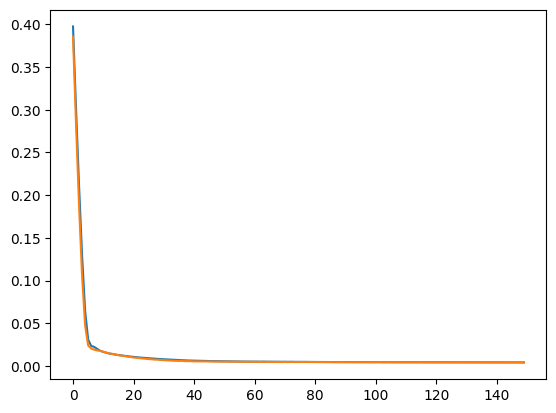

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])